In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import glob
from timeit import default_timer as timer
from datetime import timedelta
import seaborn as sns

# Gathering the Data

# 1-read twitter_archive_enhanced.csv: 
The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [2]:
df_twitter_arch= pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
df_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
df_twitter_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [6]:
df_twitter_arch.iloc[1]

tweet_id                                                     892177421306343426
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 00:17:27 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Tilly. She's just checking pup on you....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892177421...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

# 2-read image_predictions.tsv:
This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
foldername = url.split('/')[-1]
with open(os.path.join('./',foldername), 'wb') as file:
        file.write(response.content)

In [9]:
df_tweet_image_predictions= pd.read_csv('image-predictions.tsv' , sep='\t')

In [10]:
df_tweet_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tweet_image_predictions.iloc[1]

tweet_id                                 666029285002620928
jpg_url     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
img_num                                                   1
p1                                                  redbone
p1_conf                                            0.506826
p1_dog                                                 True
p2                                       miniature_pinscher
p2_conf                                           0.0741917
p2_dog                                                 True
p3                                      Rhodesian_ridgeback
p3_conf                                             0.07201
p3_dog                                                 True
Name: 1, dtype: object

In [13]:
df_tweet_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# 3. Additional Data via the Twitter API

In [14]:
CONSUMER_KEY = '-'
CONSUMER_SECRET = '-'
OAUTH_TOKEN = '-'
OAUTH_TOKEN_SECRET = '-'

In [15]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True,
                 parser=tweepy.parsers.JSONParser())

In [16]:
#Count the tweets ids
tweet_ids = df_twitter_arch.tweet_id.values
print(" No. of Tweet_ids: " + str(len(tweet_ids)) + "\n")

 No. of Tweet_ids: 2356



In [17]:
#Splite the tweets to (Oreginal tweets & Retweets lists & count the duration between the start time and end time by sec.)
exp_tweets_list = []
errors_list = []
start_time = timer()
for tweet_id in df_twitter_arch['tweet_id']:   
      
        try:
            exp_tweets_list.append(api.get_status(tweet_id))
        except Exception as error:
            print("Error on tweet id {}".format(tweet_id) + ";" + str(error))
            errors_list.append(tweet_id)
print("The No. of Tweets in List: " ,len(exp_tweets_list))
print("The No. of Errors Tweets in List:" ,len(errors_list))
end_time = timer()
duration= end_time - start_time
print("The End Time: ",(end_time))
print("The Start Time: " ,(start_time))
print("The Duration Time by seconds: " ,timedelta(duration))

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

Rate limit reached. Sleeping for: 408


Error on tweet id 713411074226274305;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 678991772295516161;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 676811746707918848;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 675820929667219457;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 674800520222154752;Failed to send request: ('Connection aborted.', ConnectionResetError(10054

Rate limit reached. Sleeping for: 415


Error on tweet id 668248472370458624;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
The No. of Tweets in List:  2319
The No. of Errors Tweets in List: 37
The End Time:  2106.6703908
The Start Time:  11.9029883
The Duration Time by seconds:  2094 days, 18:25:03.576000


In [18]:
with open('tweet_json.txt', 'w') as newfile:
        newfile.write(json.dumps(exp_tweets_list, indent=4))

In [19]:
# create data list
data = []
for each_json_tweet in exp_tweets_list:
    data.append(each_json_tweet)

In [20]:
#read dictionary list 
with open('tweet_json.txt', encoding='utf-8') as json_file:
    dictionary_list = json.loads(json_file.read())
    print(dictionary_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

In [21]:
# Read json file & create pandas dataframe
df_new_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    dictionary_list = json.loads(json_file.read())
    for each_dictionary in dictionary_list:
        tweet_id = each_dictionary['id']
        text_tweet = each_dictionary['text']
        expanded_urls = text_tweet[text_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        url_source = each_dictionary['source']

        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = expanded_urls
        else:
            retweeted_status = 'Error'
            url = '-'

        df_new_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'expanded_urls': url,
                             'url_source': url_source,
                             'retweeted_status': retweeted_status,
                            })
        df_json_tweets = pd.DataFrame(df_new_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'source','retweeted_status', 'expanded_urls'])

In [22]:
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2319 non-null   object 
 1   favorite_count    2319 non-null   int64  
 2   retweet_count     2319 non-null   int64  
 3   source            0 non-null      float64
 4   retweeted_status  2319 non-null   object 
 5   expanded_urls     2319 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 108.8+ KB


In [23]:
# convert file .csv
df_json_tweets.to_csv('json_tweets.csv', index = False)

# Assess Data:
”That's where the inspection of our collected data sets from both the Quality and Tidiness perspectives will be conducted.”

In [24]:
# Load the gathered data files
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
api_df = pd.read_csv('json_tweets.csv')

# 1-1 Visual Assessment for Archive Data

In [25]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# 1-2 Visual Assessment for Image Predictions Data

In [26]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# 1-3 Visual Assessment for API Data

In [27]:
api_df

,tweet_id,favorite_count,retweet_count,source,retweeted_status,expanded_urls
0,892420643555336193,34820,7294,NaN,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30157,5452,NaN,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22696,3592,NaN,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38079,7486,NaN,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36369,8046,NaN,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...
2314,666049248165822465,92,37,NaN,Original tweet,https://t.co/4B7cOc1EDq
2315,666044226329800704,256,120,NaN,Original tweet,https://t.co/DWnyCjf2mx
2316,666033412701032449,105,38,NaN,Original tweet,https://t.co/y671yMhoiR
2317,666029285002620928,117,41,NaN,Original tweet,https://t.co/r7mOb2m0UI


# 2-1 Programmatic Assessment (Archive Data )

In [28]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
print("Duplicated:  {}".format(sum(archive_df.duplicated())))

Duplicated:  0


In [30]:
# Missing values
archive_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [31]:
# Missing values & invalid strings in the name column
archive_df.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None


In [32]:
# dates in string form
print("Data type for timestamp:  " + str(type(archive_df.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [33]:
# List Values of "None"
archive_df.name.value_counts().head(50)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
Daisy        7
Buddy        7
Bailey       7
an           7
Milo         6
Koda         6
Scout        6
Oscar        6
Rusty        6
Jack         6
Bella        6
Leo          6
Stanley      6
Dave         6
Jax          6
Chester      5
Phil         5
Oakley       5
very         5
Finn         5
George       5
Bentley      5
Gus          5
Sunny        5
Larry        5
Alfie        5
Louis        5
Sammy        5
Winnie       4
Bruce        4
Carl         4
Maximus      4
Sampson      4
Cassie       4
Chip         4
just         4
Name: name, dtype: int64

In [34]:
# filter non-capitalized names
noncapitalized_names = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[noncapitalized_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [35]:
# len of names starts with small letter
len(archive_df[noncapitalized_names])

109

In [36]:
archive_df.text.sample(50)

320     Meet Chester (bottom) &amp; Harold (top). They...
2095    Meet Vincent. He's a wild Adderall Cayenne. Sh...
531     Here we have Burke (pupper) and Dexter (doggo)...
2296    This is Clybe. He is an Anemone Valdez. One ea...
1080                                   @mount_alex3 13/10
2353    Here is a very happy pup. Big fan of well-main...
517     This is Hunter. He just found out he needs bra...
271     This is Dawn. She's just checking pup on you. ...
929     This is Milo. He's currently plotting his reve...
957     This is Max. She has one ear that's always sli...
75      Meet Shadow. In an attempt to reach maximum zo...
1710    This is Penny. Her tennis ball slowly rolled d...
523     I call this one "A Blep by the Sea" 12/10 http...
1402    "Don't ever talk to me or my son again." ...bo...
572                 oh h*ck 10/10 https://t.co/bC69RrW559
820     Meet Al Cabone. He's a gangsta puppa. Rather h...
1693    This is actually a lion. We only rate dogs. Fo...
118     RT @do

In [37]:
# rating_numerator & rating_denominator , (The max values are big: 1776, 170.)
archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [38]:
# Values of rating numerators 
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [39]:
print(archive_df.loc[archive_df.rating_numerator == 12, 'text']) 
print(archive_df.loc[archive_df.rating_numerator == 420, 'text']) 
print(archive_df.loc[archive_df.rating_numerator == 0, 'text'])

2       This is Archie. He is a rare Norwegian Pouncin...
4       This is Franklin. He would like you to stop ca...
13      This is Ted. He does his best. Sometimes that'...
16      This is Jim. He found a fren. Taught him how t...
20      This is Gerald. He was just told he didn't get...
                              ...                        
2284    *takes several long deep breaths* omg omg oMG ...
2293    This is Pipsy. He is a fluffball. Enjoys trave...
2301              12/10 gimme now https://t.co/QZAnwgnOMB
2307    12/10 simply brilliant pup https://t.co/V6ZzG4...
2324    *internally screaming* 12/10 https://t.co/YMcr...
Name: text, Length: 558, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object


In [40]:
# Values of rating denominators
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [41]:
print(archive_df.loc[archive_df.rating_denominator == 10, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 80, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 0, 'text'])

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2333, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [42]:
# display tweets with numerator = 0 
zero_find = (archive_df.rating_denominator == 10) & \
            (archive_df.rating_numerator == 0) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

zero_data = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_df[zero_find][zero_data]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


In [43]:
# diplay text in order to verify numerators and denominators
print(archive_df['text'][313]) 
print(archive_df['text'][189]) 
print(archive_df['text'][1779])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [44]:
# missing & issued rating
print(archive_df['text'][342]) 
print(archive_df['text'][516]) 
print(archive_df['text'][784]) 

@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


In [45]:
# missing data in expanded_urls
sum(archive_df.expanded_urls.isna())

59

In [46]:
#count missing expanded_urls
sum(archive_df.expanded_urls.isna() & \
    (archive_df.in_reply_to_status_id.notnull() | \
     archive_df.retweeted_status_id.notnull()))

56

In [47]:
# display tweets that are missing expanded_urls
murl_tweets = archive_df.expanded_urls.isna() & \
       archive_df.in_reply_to_status_id.isna() & \
       archive_df.retweeted_status_id.isna()
archive_df[murl_tweets][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [48]:
# Values of Source
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [49]:
#values for doggo dogs
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [50]:
#values for floofer dogs
archive_df.floofer.value_counts()                         

None       2346
floofer      10
Name: floofer, dtype: int64

In [51]:
#values for pupper dogs
archive_df.pupper.value_counts()                      

None      2099
pupper     257
Name: pupper, dtype: int64

In [52]:
#values for puppo dogs
archive_df.puppo.value_counts()   

None     2326
puppo      30
Name: puppo, dtype: int64

# 2-2 Programmatic Assessment (Image Prediction Data ) 

In [53]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
image_predictions_df.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [55]:
image_predictions_df.tail(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True


In [56]:
print("Duplicated:  {}".format(sum(image_predictions_df.duplicated())))

Duplicated:  0


In [57]:
sum(image_predictions_df.jpg_url.duplicated())

66

In [58]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [59]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [60]:
image_predictions_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [61]:
image_predictions_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [62]:
image_predictions_df[~image_predictions_df.p1_dog & \
               ~image_predictions_df.p2_dog & \
               ~image_predictions_df.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(50)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [63]:
sum(~image_predictions_df.p1_dog & \
    ~image_predictions_df.p2_dog & \
    ~image_predictions_df.p3_dog)

324

# 2-3 Programmatic Assessment (API Data ) 

In [64]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2319 non-null   int64  
 1   favorite_count    2319 non-null   int64  
 2   retweet_count     2319 non-null   int64  
 3   source            0 non-null      float64
 4   retweeted_status  2319 non-null   object 
 5   expanded_urls     2319 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 108.8+ KB


In [65]:
api_df.head(50)

,tweet_id,favorite_count,retweet_count,source,retweeted_status,expanded_urls
0,892420643555336193,34820,7294,NaN,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30157,5452,NaN,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22696,3592,NaN,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38079,7486,NaN,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36369,8046,NaN,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18340,2698,NaN,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10679,1741,NaN,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,58648,16368,NaN,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25256,3742,NaN,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,28806,6318,NaN,Original tweet,https://t.co/l3TSS3o2M0


In [66]:
api_df.tail(50)

,tweet_id,favorite_count,retweet_count,source,retweeted_status,expanded_urls
2269,666835007768551424,190,70,NaN,Original tweet,https://t.co/ZnEMHBsAs1
2270,666826780179869698,232,81,NaN,Original tweet,https://t.co/V6ZzG45zzG
2271,666817836334096384,463,225,NaN,Original tweet,https://t.co/8whlkYw3mO
2272,666804364988780544,212,79,NaN,Original tweet,https://t.co/RdKbAOEpDK
2273,666786068205871104,681,429,NaN,Original tweet,https://t.co/EIn5kElY1S
2274,666781792255496192,347,171,NaN,Original tweet,https://t.co/uEvsGLOFHa
2275,666776908487630848,315,152,NaN,Original tweet,https://t.co/XNGeDwrtYH
2276,666739327293083650,213,60,NaN,Original tweet,https://t.co/tI3uFLDHBI
2277,666701168228331520,388,193,NaN,Original tweet,https://t.co/uQbZJM2DQB
2278,666691418707132416,168,43,NaN,Original tweet,https://t.co/bg4TqvvkuF


In [67]:
api_df.describe()

,tweet_id,favorite_count,retweet_count,source
count,2.319000e+03,2319.000000,2319.000000,0.0
mean,7.419370e+17,7269.748599,2568.942648,NaN
std,6.826698e+16,11305.549356,4347.165265,NaN
min,6.660209e+17,0.000000,1.000000,NaN
25%,6.783065e+17,1257.000000,521.000000,NaN
50%,7.182469e+17,3148.000000,1195.000000,NaN
75%,7.986692e+17,8882.500000,2979.000000,NaN
max,8.924206e+17,149529.000000,73601.000000,NaN


In [68]:
api_df.sample(5)

,tweet_id,favorite_count,retweet_count,source,retweeted_status,expanded_urls
1698,679854723806179328,2724,1158,NaN,Original tweet,https://t.co/RtxxACzZ8A
1646,682059653698686977,4705,1585,NaN,Original tweet,https://t.co/IriJlVZ6m4
882,757725642876129280,4389,1159,NaN,Original tweet,https://t.co/rptsOm73Wr
1566,686050296934563840,2124,692,NaN,Original tweet,https://t.co/BUyX7isHRg
2002,671550332464455680,839,192,NaN,Original tweet,s


In [69]:
api_df.retweeted_status.value_counts()

Original tweet    2157
Error              162
Name: retweeted_status, dtype: int64

In [70]:
api_df.source.value_counts()

Series([], Name: source, dtype: int64)

# Data issues list:

# Data Quality:
1. Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.
2. Some rows from the tail() output have invalid strings in the name column
3. The timestamp column has dates in string form.
4. Values of "None" in the name column.
5. Rating_numerator & denominator (the minimum value is 0 for both of them , the max value are big )
6. There are 5 tweets with rating_numerator greater than 15
7. Missing values for the dogs
8. Duplicate in image data jpg_url
    
# Data Tidiness:
1. archive_df should be joined to image_predictions_df and api_df
2. The dog stage column is missing in the master dataset

# Cleaning Data

# 1- Clean Archive Data

In [71]:
clean_twitter_archive = archive_df.copy()

In [72]:
len_twitter_arch = clean_twitter_archive.shape[0]; len_twitter_arch

2356

# Define
    * drop retweets data & reply data

# Code

In [73]:
# drop retweets data & reply data
drop_retweet = clean_twitter_archive[pd.notnull(clean_twitter_archive['retweeted_status_id'])].index
drop_reply = clean_twitter_archive[pd.notnull(clean_twitter_archive['in_reply_to_status_id'])].index

In [74]:
print("No. of retweets:  {}".format(sum(clean_twitter_archive.retweeted_status_id.notnull())))

No. of retweets:  181


In [75]:
print("No. of replies:  {}".format(sum(clean_twitter_archive.in_reply_to_status_id.notnull())))

No. of replies:  78


# Test

In [76]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [77]:
clean_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


# Define:
     * replace the stage name with 1, and 'None' with 0, like a temp variable
     * reset values in 'none'
     * Drop tweets with missing data in the expanded_urls

# Code

In [78]:
# replace the stage name with 1, and 'None' with 0, like a temp variable
temp = lambda x: 0 if x == 'None' else 1
clean_twitter_archive.doggo = clean_twitter_archive.doggo.apply(temp)
clean_twitter_archive.floofer = clean_twitter_archive.floofer.apply(temp)
clean_twitter_archive.pupper = clean_twitter_archive.pupper.apply(temp)
clean_twitter_archive.puppo = clean_twitter_archive.puppo.apply(temp)

clean_twitter_archive['none'] = clean_twitter_archive['doggo'] + clean_twitter_archive['floofer'] + \
                        clean_twitter_archive['pupper'] + clean_twitter_archive['puppo']

clean_twitter_archive['none'].value_counts()

0    1976
1     366
2      14
Name: none, dtype: int64

In [79]:
case_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
clean_twitter_archive['none'] = clean_twitter_archive['none'].apply(case_none)

case = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (clean_twitter_archive[case[0]] == 1),
    (clean_twitter_archive[case[1]] == 1),
    (clean_twitter_archive[case[2]] == 1),
    (clean_twitter_archive[case[3]] == 1),
    (clean_twitter_archive[case[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
clean_twitter_archive['case'] = np.select(conditions, case, default = case[4])

# drop the original 4 dog stage columns, AND the temporary 'None'
clean_twitter_archive.drop(case, axis = 1, inplace = True)

# set the column data type to category
clean_twitter_archive['case'] = clean_twitter_archive.case.astype('category')


In [81]:
clean_twitter_archive.drop(index=drop_retweet, inplace=True)
clean_twitter_archive.drop(index=drop_reply, inplace=True)

In [82]:
# Drop tweets with missing data in the expanded_urls
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.expanded_urls.notnull()]

In [83]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isna()]

# Test

In [84]:
clean_twitter_archive.case.value_counts()

none       1759
pupper      220
doggo        81
puppo        24
floofer      10
Name: case, dtype: int64

In [85]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2094 non-null   int64   
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   2094 non-null   object  
 4   source                      2094 non-null   object  
 5   text                        2094 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               2094 non-null   object  
 10  rating_numerator            2094 non-null   int64   
 11  rating_denominator          2094 non-null   int64   
 12  name                        2094 non-null   object  
 13  case              

# Define:
    *  Extract the string between <a href=""> and </a>.

# Code

In [86]:
# Extract the string between <a href=""> and </a>.
clean_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [87]:
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.extract('^<a.+>(.+)</a>$')

# Test

In [88]:
clean_twitter_archive.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

# Define:
    *  drop columns with missing values using
    *  confirm the rows are dropped; compare with original table length
    *  Convert timestamp to datetime data type

# Code

In [89]:
# drop columns with missing values using
clean_twitter_archive.dropna(axis='columns',how='any', inplace=True)

In [90]:
clean_twitter_archive.drop(columns='source', inplace=True)

In [91]:
# confirm the rows are dropped; compare with original table length
print("No. of Dropped Rows:  {}".format(len_twitter_arch - clean_twitter_archive.shape[0]))

No. of Dropped Rows:  262


In [92]:
# Convert timestamp to datetime data type
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive.timestamp)
clean_twitter_archive['timestamp'] = clean_twitter_archive.timestamp.dt.floor('s')

# Test

In [93]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   text                2094 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2094 non-null   int64              
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   case                2094 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 133.1+ KB


# Define
     * Drop the remaining tweets with rating_denominator values that are NOT equal to 10.
     * Drop tweets that have rating_numerator more than 15.

# Code

In [94]:
# Drop the remaining tweets with rating_denominator values that are NOT equal to 10.
clean_twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        2
10     2077
7         1
2         1
Name: rating_denominator, dtype: int64

In [95]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.rating_denominator == 10]

In [96]:
clean_twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

10    2077
Name: rating_denominator, dtype: int64

In [97]:
# Drop tweets that have rating_numerator more than 15.
greatervalue = clean_twitter_archive.rating_numerator >= 15
clean_twitter_archive[greatervalue].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

# Test

In [98]:
# display ALL numerators
clean_twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
75        1
27        1
26        1
14       38
13      287
12      485
11      413
10      434
9       152
8        98
7        51
6        32
5        34
4        15
3        19
2         9
1         4
0         1
Name: rating_numerator, dtype: int64

In [99]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   text                2077 non-null   object             
 3   expanded_urls       2077 non-null   object             
 4   rating_numerator    2077 non-null   int64              
 5   rating_denominator  2077 non-null   int64              
 6   name                2077 non-null   object             
 7   case                2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 132.0+ KB


# Define: 
    * Replace all lowercase words in the name column lowername
    * 

# Code

In [100]:
# Replace all lowercase words in the name column lowername
lowername = clean_twitter_archive.name.str.contains('^[a-z]', regex = True)
clean_twitter_archive[lowername].name.value_counts().sort_index()

a               54
actually         2
all              1
an               5
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [101]:
clean_twitter_archive.loc[lowername, 'name'] = "notword"

In [102]:
# Count Non- word
clean_twitter_archive[lowername].name.value_counts().sort_index()

notword    101
Name: name, dtype: int64

# 2- Cleanining Image Prediction Data 

In [103]:
clean_image_prediction = image_predictions_df.copy()

# Define
    * Drop Missing values for the dogs
    * Duplicate in image data jpg_url

# Code

In [104]:
# put the conditions for selection
cond = [(clean_image_prediction['p1_dog'] == True),
              (clean_image_prediction['p2_dog'] == True),
              (clean_image_prediction['p3_dog'] == True)]

In [105]:
# the choice order for predicted breed
breed_choice = [clean_image_prediction['p1'], 
                 clean_image_prediction['p2'],
                 clean_image_prediction['p3']]

In [106]:
# the choice order for confidence level
confidence_level = [clean_image_prediction['p1_conf'], 
                      clean_image_prediction['p2_conf'], 
                      clean_image_prediction['p3_conf']]

In [107]:
# the predicted breed
clean_image_prediction['breed'] = np.select(cond, breed_choice, 
                                       default = 'none')

In [108]:
# the confidence
clean_image_prediction['confidence'] = np.select(cond, confidence_level, 
                                            default = 0)

# Test

In [109]:
clean_image_prediction.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [110]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   text                2077 non-null   object             
 3   expanded_urls       2077 non-null   object             
 4   rating_numerator    2077 non-null   int64              
 5   rating_denominator  2077 non-null   int64              
 6   name                2077 non-null   object             
 7   case                2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 132.0+ KB


# Define :
    * merge the breed and confidence columns to archive
    * change data type for the confidence
    * drop col

# Code

In [111]:
# merge the breed and confidence columns to archive
merge_cols = ['tweet_id', 'breed', 'confidence']
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_image_prediction[merge_cols],
                         on = 'tweet_id', how = 'inner')

In [112]:
# change data type for the confidence 
clean_twitter_archive.confidence = (clean_twitter_archive.confidence * 100).astype(int)

In [113]:
# drop columns
clean_image_prediction.drop(['breed', 'confidence'], axis = 1, inplace = True)

# Test

In [114]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   int64              
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   text                1954 non-null   object             
 3   expanded_urls       1954 non-null   object             
 4   rating_numerator    1954 non-null   int64              
 5   rating_denominator  1954 non-null   int64              
 6   name                1954 non-null   object             
 7   case                1954 non-null   category           
 8   breed               1954 non-null   object             
 9   confidence          1954 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(3), object(4)
memory usage: 147.1+ KB


In [115]:
clean_twitter_archive.head(50)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,case,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,basset,55
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,none,Chesapeake_Bay_retriever,42
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,none,Appenzeller,34
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,none,Pomeranian,56
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,none,Irish_terrier,48
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,Pembroke,51


In [116]:
list(clean_image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

# Define:
    * Drop the rating_denominator column
    * Rename the rating_numerator column to be rating
    * extract the decimal ratings with regular expressions

# Code

In [117]:
# Drop the rating_denominator column
clean_twitter_archive.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

In [118]:
clean_twitter_archive.drop(['rating_denominator'], axis = 1, inplace = True)

In [119]:
# Rename the rating_numerator column to be rating
clean_twitter_archive.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [120]:
# extract the decimal ratings with regular expressions
clean_twitter_archive[clean_twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating']]

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating
39,This is Bella. She hopes her smile made you sm...,5
497,"This is Logan, the Chow who lived. He solemnly...",75
547,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1345,Here we have uncovered an entire battalion of ...,26


In [121]:
# bring numerical columns to the left
toleft = list(clean_twitter_archive.columns)
print(toleft)

['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating', 'name', 'case', 'breed', 'confidence']


In [122]:
# set in left
toleft = ['tweet_id', 'timestamp', 'rating',
            'breed', 'confidence', 'name','text']

clean_twitter_archive = clean_twitter_archive[toleft]

# Test

In [123]:
clean_twitter_archive.head(15)

,tweet_id,timestamp,rating,breed,confidence,name,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13,none,0,Phineas,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,13,Chihuahua,32,Tilly,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03+00:00,12,Chihuahua,71,Archie,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51+00:00,13,Labrador_retriever,16,Darla,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24+00:00,12,basset,55,Franklin,This is Franklin. He would like you to stop ca...
5,891087950875897856,2017-07-29 00:08:17+00:00,13,Chesapeake_Bay_retriever,42,None,Here we have a majestic great white breaching ...
6,890971913173991426,2017-07-28 16:27:12+00:00,13,Appenzeller,34,Jax,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,2017-07-28 00:22:40+00:00,13,Pomeranian,56,None,When you watch your owner call another dog a g...
8,890609185150312448,2017-07-27 16:25:51+00:00,13,Irish_terrier,48,Zoey,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,2017-07-26 15:59:51+00:00,14,Pembroke,51,Cassie,This is Cassie. She is a college pup. Studying...


# 3- Clean Tweet Json Data

In [124]:
clean_tweet_json = api_df.copy()

# Test

In [125]:
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2319 non-null   int64  
 1   favorite_count    2319 non-null   int64  
 2   retweet_count     2319 non-null   int64  
 3   source            0 non-null      float64
 4   retweeted_status  2319 non-null   object 
 5   expanded_urls     2319 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 108.8+ KB


# Define :
     * Merge columns TWEET_ID for clean_twitter_archive & clean_tweet_json

# Code

In [126]:
# Merge columns TWEET_ID for clean_twitter_archive & clean_tweet_json
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_json, 
                         on = 'tweet_id', how = 'left')

# Test

In [127]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   rating            1954 non-null   int64              
 3   breed             1954 non-null   object             
 4   confidence        1954 non-null   int32              
 5   name              1954 non-null   object             
 6   text              1954 non-null   object             
 7   favorite_count    1936 non-null   float64            
 8   retweet_count     1936 non-null   float64            
 9   source            0 non-null      float64            
 10  retweeted_status  1936 non-null   object             
 11  expanded_urls     1936 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int32(1), int64(2), obj

# Define :
     * Drop tweets with missing json_data
     * recast the count columns

# Code

In [128]:
# Drop tweets with missing json_data
drop_jsonv = ['tweet_id', 'retweet_count', 'favorite_count']
clean_twitter_archive[clean_twitter_archive.retweet_count.isna() | clean_twitter_archive.favorite_count.isna()][drop_jsonv]

,tweet_id,retweet_count,favorite_count
85,872261713294495745,NaN,NaN
191,844704788403113984,NaN,NaN
195,843604394117681152,NaN,NaN
220,837366284874571778,NaN,NaN
267,829374341691346946,NaN,NaN
362,813187593374461952,NaN,NaN
486,788908386943430656,NaN,NaN
537,779123168116150273,NaN,NaN
681,754011816964026368,NaN,NaN
694,751937170840121344,NaN,NaN


In [129]:
clean_twitter_archive = clean_twitter_archive[~(clean_twitter_archive.retweet_count.isna() | clean_twitter_archive.favorite_count.isna())]

# recast the count columns 
clean_twitter_archive.retweet_count = clean_twitter_archive.retweet_count.astype(int)
clean_twitter_archive.favorite_count = clean_twitter_archive.favorite_count.astype(int)

# Test

In [130]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1953
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1936 non-null   int64              
 1   timestamp         1936 non-null   datetime64[ns, UTC]
 2   rating            1936 non-null   int64              
 3   breed             1936 non-null   object             
 4   confidence        1936 non-null   int32              
 5   name              1936 non-null   object             
 6   text              1936 non-null   object             
 7   favorite_count    1936 non-null   int32              
 8   retweet_count     1936 non-null   int32              
 9   source            0 non-null      float64            
 10  retweeted_status  1936 non-null   object             
 11  expanded_urls     1936 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), int64(2), obj

# Store Data

In [131]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index = False)

In [132]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is DEF9-11AE

 Directory of C:\Users\lenovo\Data_Wrangling

05/12/2021  01:35 PM           154,832 json_tweets.csv
05/12/2021  03:33 PM           471,340 twitter_archive_master.csv
04/18/2021  10:51 PM           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,541,864 bytes
               0 Dir(s)  244,498,530,304 bytes free


#  Analyze Data

In [133]:
# display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [134]:
# new copy of the archive master table
we_rate_dogs = clean_twitter_archive.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1953
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1936 non-null   int64              
 1   timestamp         1936 non-null   datetime64[ns, UTC]
 2   rating            1936 non-null   int64              
 3   breed             1936 non-null   object             
 4   confidence        1936 non-null   int32              
 5   name              1936 non-null   object             
 6   text              1936 non-null   object             
 7   favorite_count    1936 non-null   int32              
 8   retweet_count     1936 non-null   int32              
 9   source            0 non-null      float64            
 10  retweeted_status  1936 non-null   object             
 11  expanded_urls     1936 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), int64(2), obj

In [135]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [136]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1936.000000,1936.000000,1936.000000,1936.00000
mean,11.704029,2343.981405,8011.460227,45.96126
std,41.269978,4196.771657,11803.654544,33.86030
min,0.000000,11.000000,69.000000,0.00000
25%,10.000000,521.750000,1687.250000,13.00000
50%,11.000000,1131.000000,3606.500000,45.00000
75%,12.000000,2686.750000,10025.500000,77.00000
max,1776.000000,73601.000000,149529.000000,99.00000


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


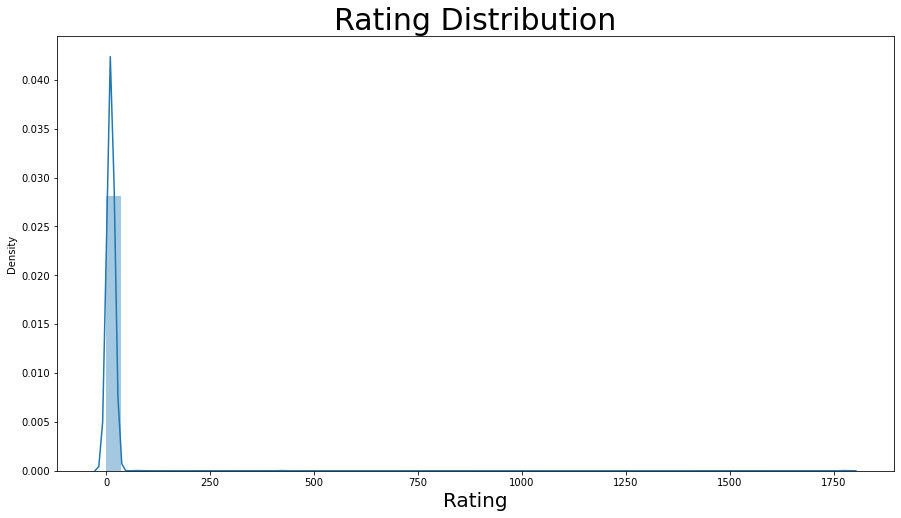

In [137]:
# Visualization for dog rating distribution:
plt.figure(figsize=(15,8))
plt.title("Rating Distribution", size=30)
sns.distplot(we_rate_dogs.rating)
plt.xlabel("Rating", size=20);

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


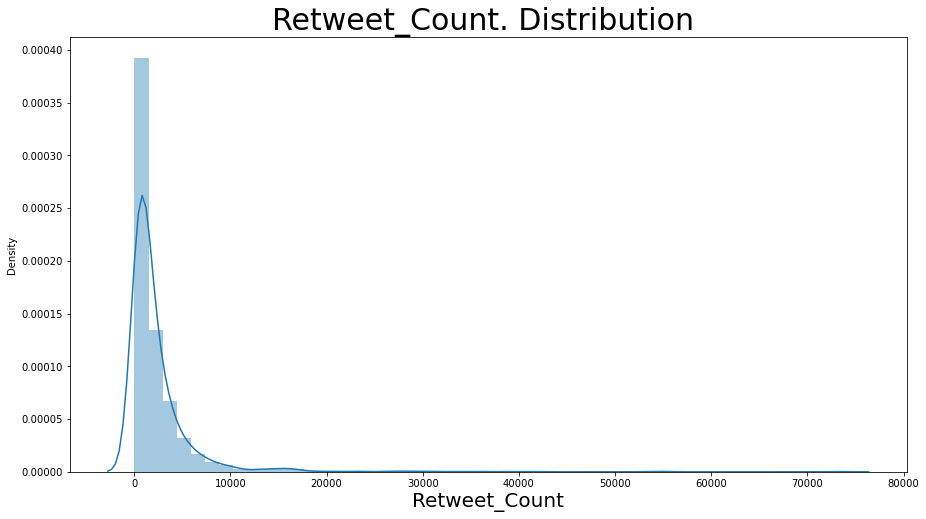

In [138]:
# Visualization for retweet_count distribution:
plt.figure(figsize=(15,8))
plt.title("Retweet_Count. Distribution ", size=30)
sns.distplot(we_rate_dogs.retweet_count);
plt.xlabel("Retweet_Count", size=20);

In [139]:
# tweets % with rating of 10 & up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1530
Percentage of tweets:                79%


In [140]:
# favorite count less than retweet count
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

In [141]:
# the most favourited tweet to date
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(15)

,tweet_id,timestamp,rating,breed,confidence,name,text,favorite_count,retweet_count,source,retweeted_status,expanded_urls
766,744234799360020481,2016-06-18 18:26:18+00:00,13,Labrador_retriever,82,None,Here's a doggo realizing you can stand in a po...,149529,73601,NaN,Original tweet,https://t.co/7wE9LTEXC4
306,822872901745569793,2017-01-21 18:26:02+00:00,13,Lakeland_terrier,19,None,Here's a super supportive puppo participating ...,127953,41531,NaN,Original tweet,https://t.co/nTz3FtorBc
395,807106840509214720,2016-12-09 06:17:20+00:00,13,Chihuahua,50,Stephan,This is Stephan. He just wants to help. 13/10 ...,115525,53737,NaN,Original tweet,https://t.co/DkBYaCAg2d
108,866450705531457537,2017-05-22 00:28:40+00:00,13,French_bulldog,90,Jamesy,This is Jamesy. He gives a kiss to every other...,112139,31387,NaN,Original tweet,https://t.co/wk7TfysWHr
800,739238157791694849,2016-06-04 23:31:25+00:00,13,Eskimo_dog,50,None,Here's a doggo blowing bubbles. It's downright...,110645,54868,NaN,Original tweet,https://t.co/YcXgHfp1EC
58,879415818425184262,2017-06-26 19:07:24+00:00,13,English_springer,38,Duddles,This is Duddles. He did an attempt. 13/10 some...,95665,38771,NaN,Original tweet,https://t.co/UDT7ZkcTgY
329,819004803107983360,2017-01-11 02:15:36+00:00,14,standard_poodle,35,Bo,This is Bo. He was a very good First Doggo. 14...,85162,35803,NaN,Original tweet,https://t.co/AdPKrI8BZ1
134,859196978902773760,2017-05-02 00:04:57+00:00,12,malamute,21,notword,We only rate dogs. This is quite clearly a smo...,83174,27264,NaN,Original tweet,https://t.co/r6huxnDPOZ
93,870374049280663552,2017-06-01 20:18:38+00:00,13,golden_retriever,84,Zoey,This is Zoey. She really likes the planet. Wou...,76115,23526,NaN,Original tweet,https://t.co/6SWu4xkvDk
1395,678399652199309312,2015-12-20 02:20:55+00:00,12,Bedlington_terrier,1,None,This made my day. 12/10 please enjoy https://t...,75920,29765,NaN,Original tweet,https://t.co/VRTbo3aAcm


In [142]:
# most common case
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(15)

,tweet_id,timestamp,rating,breed,confidence,name,text,favorite_count,retweet_count,source,retweeted_status,expanded_urls
766,744234799360020481,2016-06-18 18:26:18+00:00,13,Labrador_retriever,82,None,Here's a doggo realizing you can stand in a po...,149529,73601,NaN,Original tweet,https://t.co/7wE9LTEXC4
800,739238157791694849,2016-06-04 23:31:25+00:00,13,Eskimo_dog,50,None,Here's a doggo blowing bubbles. It's downright...,110645,54868,NaN,Original tweet,https://t.co/YcXgHfp1EC
395,807106840509214720,2016-12-09 06:17:20+00:00,13,Chihuahua,50,Stephan,This is Stephan. He just wants to help. 13/10 ...,115525,53737,NaN,Original tweet,https://t.co/DkBYaCAg2d
306,822872901745569793,2017-01-21 18:26:02+00:00,13,Lakeland_terrier,19,None,Here's a super supportive puppo participating ...,127953,41531,NaN,Original tweet,https://t.co/nTz3FtorBc
58,879415818425184262,2017-06-26 19:07:24+00:00,13,English_springer,38,Duddles,This is Duddles. He did an attempt. 13/10 some...,95665,38771,NaN,Original tweet,https://t.co/UDT7ZkcTgY
329,819004803107983360,2017-01-11 02:15:36+00:00,14,standard_poodle,35,Bo,This is Bo. He was a very good First Doggo. 14...,85162,35803,NaN,Original tweet,https://t.co/AdPKrI8BZ1
397,806629075125202948,2016-12-07 22:38:52+00:00,13,cocker_spaniel,4,None,"""Good afternoon class today we're going to lea...",72983,33610,NaN,Original tweet,https://t.co/f1h2Fsalv9
108,866450705531457537,2017-05-22 00:28:40+00:00,13,French_bulldog,90,Jamesy,This is Jamesy. He gives a kiss to every other...,112139,31387,NaN,Original tweet,https://t.co/wk7TfysWHr
1395,678399652199309312,2015-12-20 02:20:55+00:00,12,Bedlington_terrier,1,None,This made my day. 12/10 please enjoy https://t...,75920,29765,NaN,Original tweet,https://t.co/VRTbo3aAcm
1452,676219687039057920,2015-12-14 01:58:31+00:00,10,whippet,0,Kenneth,This is Kenneth. He's stuck in a bubble. 10/10...,71860,28797,NaN,Original tweet,https://t.co/uQt37xlYMJ


In [143]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  304 (16%)
Number of distinct breeds:  114


In [144]:
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(13)
print("Breed and number of tweets")

Breed and number of tweets


In [145]:
top10_breeds = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds)

top10_per = round(sum(top10_breeds) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      151
Labrador_retriever    100
Pembroke               93
Chihuahua              87
pug                    62
toy_poodle             49
chow                   47
Samoyed                41
Pomeranian             41
malamute               33
Name: breed, dtype: int64

Top 10 dog breeds make up 36% of all tweets


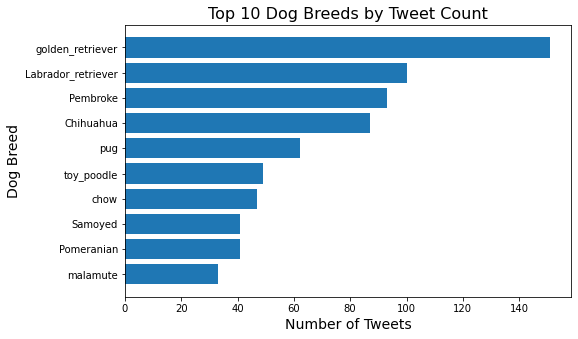

In [146]:
# Visualization for Top 10 Dog Breeds by Tweet Count:
plt.barh(top10_breeds.index, top10_breeds)

plt.xlabel('Number of Tweets', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

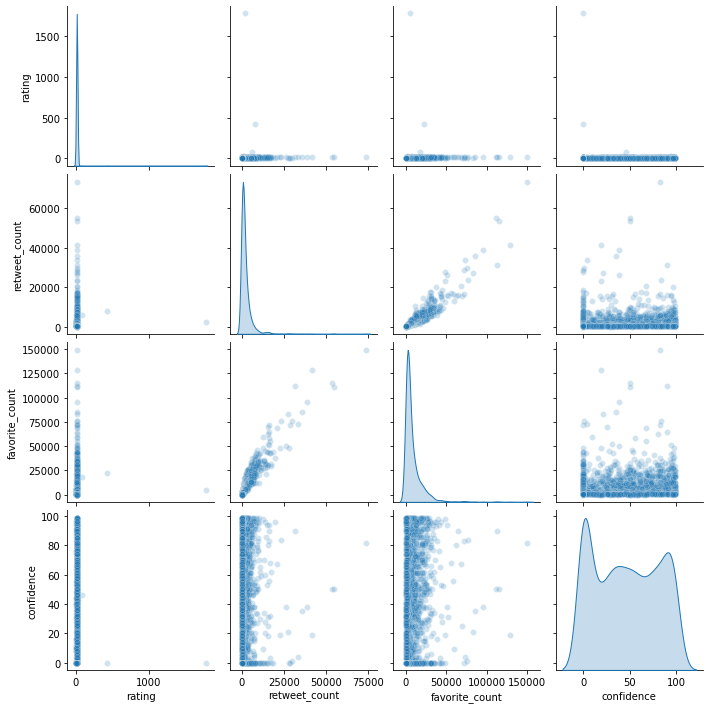

In [147]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

In [148]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1650371
Labrador_retriever    1051361
Pembroke               930350
Chihuahua              651648
French_bulldog         542040
Samoyed                496775
chow                   399059
cocker_spaniel         363690
pug                    336063
malamute               314379
Name: favorite_count, dtype: int32

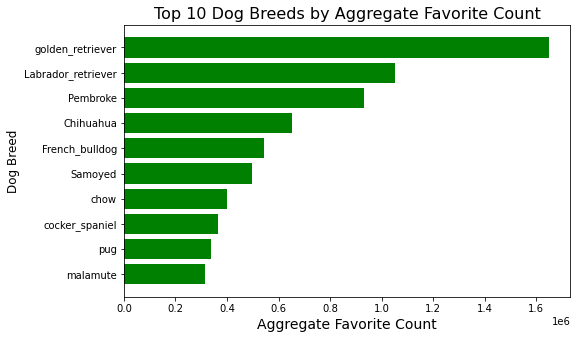

In [149]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

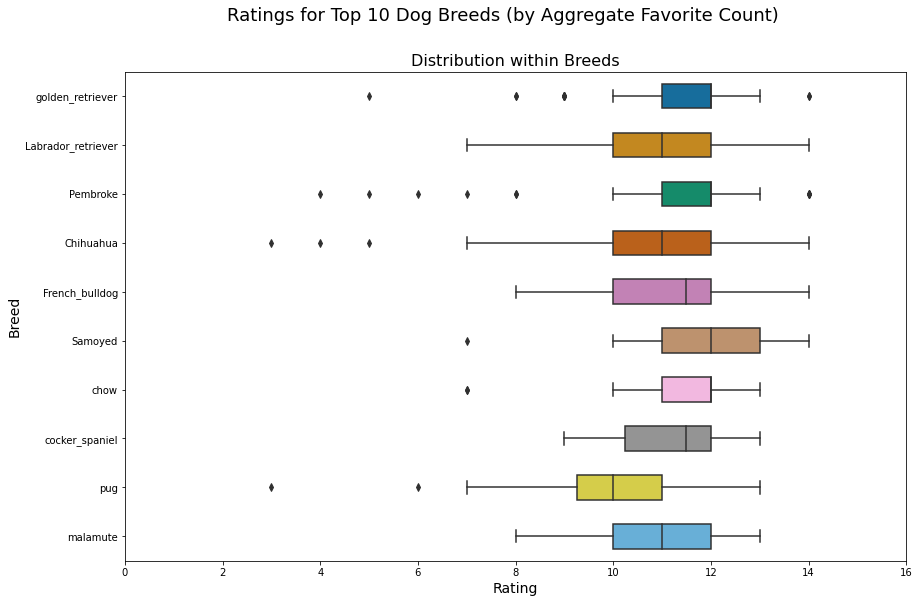

In [150]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

(-1.334886666905606,
 1.2276110388078143,
 -1.2248998127421635,
 1.200240172259608)

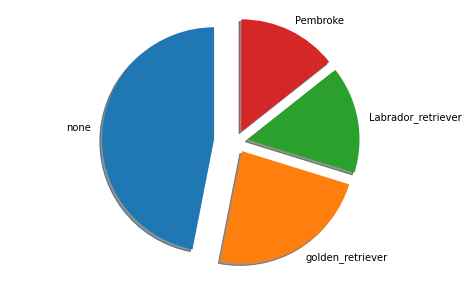

In [151]:
life_stage_count = list(we_rate_dogs[we_rate_dogs['breed'] != 'None']['breed'].value_counts())[0:4]
life_stages = we_rate_dogs[we_rate_dogs['breed'] != 'None']['breed'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')